In [1]:
import pandas as pd
import yellowcab.cleaning

In [2]:
cab_df = pd.read_parquet("../data/trip_data/01.parquet")
cab_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
6339563,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
6339564,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
6339565,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5


In [3]:
cab_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6339567 entries, 0 to 6339566
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           float64       
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
dtypes: datetime64[ns](2), float64(12), int64(2)
memory usage: 822.2 MB


In [4]:
relevant_columns = ['passenger_count', 'trip_distance', 'RatecodeID',
                    'PULocationID', 'DOLocationID', 'payment_type',
                    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                    'tolls_amount', 'improvement_surcharge', 'total_amount',
                    'congestion_surcharge']

In [5]:
for c in relevant_columns:
    print("---- %s ---" % c)
    print(cab_df[c].value_counts())

---- passenger_count ---
1.0    4547226
2.0     946423
3.0     250234
5.0     225693
6.0     132154
4.0     123470
0.0     114302
7.0         29
9.0         19
8.0         17
Name: passenger_count, dtype: int64
---- trip_distance ---
0.90     117827
0.80     117234
1.00     116409
0.70     111748
1.10     111463
          ...  
36.23         1
91.47         1
54.34         1
46.25         1
30.45         1
Name: trip_distance, Length: 4498, dtype: int64
---- RatecodeID ---
1.0     6126536
2.0      157733
5.0       36296
3.0       13476
4.0        5130
99.0        350
6.0          46
Name: RatecodeID, dtype: int64
---- PULocationID ---
237    292467
161    281545
236    271999
162    235024
186    228231
        ...  
105         2
245         1
30          1
204         1
172         1
Name: PULocationID, Length: 260, dtype: int64
---- DOLocationID ---
236    288835
237    263281
161    249359
170    196167
162    193808
        ...  
59         29
99         16
2           4
105      

In [6]:
x = yellowcab.cleaning.clean_dataset(cab_df, month=1, verbose=True)

--> 114302 invalid entries found in passenger_count
--> 65343 invalid entries found in trip_distance
--> 17104 invalid entries found in fare_amount
--> 2 invalid entries found in extra
--> 0 invalid entries found in mta_tax
--> 0 invalid entries found in tip_amount
--> 0 invalid entries found in tolls_amount
--> 0 invalid entries found in improvement_surcharge
--> 0 invalid entries found in total_amount
--> 0 invalid entries found in congestion_surcharge
196751 invalid entries have been successfully dropped!
--> 155 earlier date entries found in pickup
--> 50 later date entries found in pickup
205 invalid date entries have been successfully dropped!
--> 32 outlier detected and removed from passenger_count column using zscore
--> 7630 outlier detected and removed from trip_distance column using HBOS algorithm
--> 8 outlier detected and removed from fare_amount column using HBOS algorithm
--> 5 outlier detected and removed from extra column using HBOS algorithm
--> 23548 outlier detected

In [7]:
x

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,trip_duration_minutes,pickup_month,pickup_day,pickup_hour,dropoff_month,dropoff_day,dropoff_hour,weekend
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,Standard rate,238,239,Credit card,6.0,3.0,...,11.27,2.5,4.800000,1,1,0,1,1,0,False
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,Standard rate,239,238,Credit card,7.0,3.0,...,12.30,2.5,7.416667,1,1,0,1,1,0,False
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,Standard rate,238,238,Credit card,6.0,3.0,...,10.80,2.5,6.183333,1,1,0,1,1,0,False
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,Standard rate,238,151,Credit card,5.5,0.5,...,8.16,0.0,4.850000,1,1,0,1,1,1,False
4,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,Standard rate,7,193,Cash,2.5,0.5,...,3.80,0.0,0.883333,1,1,0,1,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063963,2020-01-31 23:00:01,2020-01-31 23:21:31,1.0,4.11,Standard rate,48,75,Credit card,17.5,0.5,...,25.56,2.5,21.500000,1,31,23,1,31,23,False
6063964,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,Standard rate,163,246,Credit card,11.0,0.5,...,17.76,2.5,14.233333,1,31,23,1,31,23,False
6063965,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,Standard rate,164,79,Credit card,13.0,0.5,...,20.16,2.5,19.000000,1,31,23,1,31,23,False
6063966,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,Standard rate,79,68,Credit card,12.5,0.5,...,19.56,2.5,16.283333,1,31,23,1,31,23,False


In [8]:
# how many faulty data do we still got here?
for c in relevant_columns:
    print("---- %s ---" % c)
    print(x[c].value_counts())

---- passenger_count ---
1.0    4425074
2.0     923406
3.0     244277
5.0     221593
6.0     129833
4.0     119785
Name: passenger_count, dtype: int64
---- trip_distance ---
0.90     112095
0.80     111533
1.00     110682
0.70     106242
1.10     106208
          ...  
26.08         1
25.35         1
26.26         1
25.27         1
25.84         1
Name: trip_distance, Length: 2618, dtype: int64
---- RatecodeID ---
Standard rate         5937811
JFK                    121187
Negotiated fare          2491
Nassau/Westchester       2318
99.0                      143
Group ride                 15
Newark                      3
Name: RatecodeID, dtype: int64
---- PULocationID ---
237    284245
161    271900
236    264814
162    227188
186    219903
        ...  
59          2
84          2
99          1
30          1
251         1
Name: PULocationID, Length: 254, dtype: int64
---- DOLocationID ---
236    281224
237    256228
161    241335
170    189685
162    187593
        ...  
105         3

In [9]:
x[x['trip_duration_minutes'] > 300]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,trip_duration_minutes,pickup_month,pickup_day,pickup_hour,dropoff_month,dropoff_day,dropoff_hour,weekend
138890,2020-01-01 18:56:37,2020-01-02,1.0,1.80,Standard rate,97,65,Credit card,14.5,0.0,...,18.36,0.0,303.383333,1,1,18,1,2,0,False
428534,2020-01-03 18:57:44,2020-01-04,1.0,1.37,Standard rate,68,186,Cash,7.5,1.0,...,11.80,2.5,302.266667,1,3,18,1,4,0,False
943877,2020-01-06 18:58:07,2020-01-07,1.0,1.05,Standard rate,236,237,Credit card,6.5,1.0,...,12.42,2.5,301.883333,1,6,18,1,7,0,False
1950188,2020-01-11 18:58:21,2020-01-12,1.0,3.01,Standard rate,125,164,Credit card,17.0,0.0,...,24.36,2.5,301.650000,1,11,18,1,12,0,True
1957859,2020-01-11 18:55:36,2020-01-12,2.0,2.77,Standard rate,163,234,Credit card,15.5,0.0,...,21.62,2.5,304.400000,1,11,18,1,12,0,True
4104963,2020-01-22 18:58:24,2020-01-23,1.0,0.55,Standard rate,239,239,Credit card,4.0,1.0,...,9.54,2.5,301.600000,1,22,18,1,23,0,False
4545831,2020-01-24 18:56:38,2020-01-25,1.0,10.58,Standard rate,132,61,Credit card,33.5,1.0,...,42.36,0.0,303.366667,1,24,18,1,25,0,False
5146228,2020-01-27 18:57:16,2020-01-28,1.0,2.64,Standard rate,264,264,Credit card,11.5,1.0,...,15.96,0.0,302.733333,1,27,18,1,28,0,False
5997395,2020-01-31 18:58:06,2020-02-01,2.0,9.25,Standard rate,132,95,Credit card,28.0,1.0,...,32.78,0.0,301.900000,1,31,18,2,1,0,False


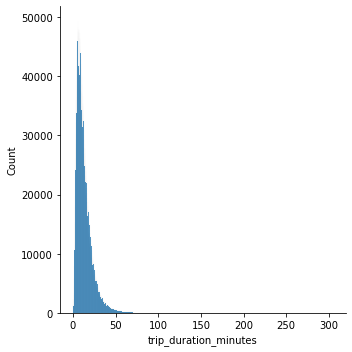

In [10]:
import seaborn as sns
sns.displot(x, x='trip_duration_minutes')

In [11]:
x.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration_minutes,pickup_month,pickup_day,pickup_hour,dropoff_month,dropoff_day,dropoff_hour
count,6.063968e+06,6.063968e+06,6.063968e+06,6.063968e+06,6063968.0,6.063968e+06,6.063968e+06,6.063968e+06,6.063968e+06,6.063968e+06,6.063968e+06,6063968.0,6.063968e+06,6.063968e+06,6.063968e+06,6.063968e+06,6.063968e+06
mean,1.545328e+00,2.734633e+00,1.187414e+01,1.078231e+00,0.5,2.107506e+00,2.599875e-01,3.000000e-01,1.771672e+01,2.340431e+00,1.277281e+01,1.0,1.656968e+01,1.391812e+01,1.000363e+00,1.656492e+01,1.397456e+01
std,1.146192e+00,3.358389e+00,9.453105e+00,1.224388e+00,0.0,2.213134e+00,1.246703e+00,3.663736e-15,1.157903e+01,6.111086e-01,9.344240e+00,0.0,8.829015e+00,5.891818e+00,1.905247e-02,8.829491e+00,5.959973e+00
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.5,0.000000e+00,0.000000e+00,3.000000e-01,8.000000e-01,0.000000e+00,0.000000e+00,1.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,9.800000e-01,6.500000e+00,0.000000e+00,0.5,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,6.400000e+00,1.0,9.000000e+00,1.000000e+01,1.000000e+00,9.000000e+00,1.000000e+01
50%,1.000000e+00,1.600000e+00,9.000000e+00,5.000000e-01,0.5,1.960000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00,1.038333e+01,1.0,1.700000e+01,1.500000e+01,1.000000e+00,1.700000e+01,1.500000e+01
75%,2.000000e+00,2.850000e+00,1.350000e+01,2.500000e+00,0.5,2.860000e+00,0.000000e+00,3.000000e-01,1.930000e+01,2.500000e+00,1.641667e+01,1.0,2.400000e+01,1.900000e+01,1.000000e+00,2.400000e+01,1.900000e+01
max,6.000000e+00,2.628000e+01,7.400000e+01,9.500000e+00,0.5,6.770000e+01,5.000000e+01,3.000000e-01,7.502000e+01,2.750000e+00,3.044000e+02,1.0,3.100000e+01,2.300000e+01,2.000000e+00,3.100000e+01,2.300000e+01


In [12]:
cab_df[cab_df['mta_tax'] == 0]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
189,2020-01-01 00:44:31,2020-01-01 00:48:46,1.0,0.80,3.0,170,107,1.0,22.50,0.5,0.0,4.65,0.00,0.3,27.95,0.0
2261,2020-01-01 00:38:44,2020-01-01 00:57:11,2.0,4.82,3.0,114,265,1.0,34.50,0.5,0.0,9.16,10.50,0.3,54.96,0.0
2472,2020-01-01 00:21:10,2020-01-01 00:22:39,1.0,0.33,1.0,146,146,2.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0
3356,2020-01-01 00:59:43,2020-01-01 01:01:51,1.0,0.36,5.0,265,265,1.0,45.00,0.0,0.0,5.00,10.50,0.3,60.80,0.0
3901,2020-01-01 00:39:20,2020-01-01 00:40:06,1.0,2.40,5.0,90,90,3.0,100.00,0.0,0.0,0.00,0.00,0.3,100.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338554,2020-01-31 23:20:38,2020-01-31 23:58:06,1.0,7.30,5.0,164,82,2.0,0.01,0.0,0.0,0.00,0.00,0.3,0.31,0.0
6338862,2020-01-31 23:27:49,2020-02-01 00:13:09,1.0,26.87,3.0,186,265,1.0,89.50,0.5,0.0,0.00,11.75,0.3,102.05,0.0
6339283,2020-01-31 23:14:13,2020-01-31 23:24:09,1.0,1.28,3.0,234,125,1.0,23.00,0.5,0.0,4.76,0.00,0.3,28.56,0.0
6339340,2020-01-31 23:05:13,2020-01-31 23:24:22,1.0,10.13,3.0,132,92,2.0,46.50,0.5,0.0,0.00,0.00,0.3,47.30,0.0
